In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import healpy as hp

In [2]:
def radec_to_sph(ra,dc):
    
    theta = (90.-dc)*np.pi/180.
    phi   = ra*np.pi/180.
    return theta, phi

In [3]:
def plot_healpix(NSIDE,ra=None,dc=None,fname=None,coord=None,rot=None,title="",cmin=0,cmax=None,h=None):

    if rot is None:
        rot = [0,0,0]

    if ra is None and h is None:
        print("You need to provide either a list of coordinates or the h histogramed pixel list")
        return

    if h is None:
        #Convert to ra/dec
        theta, phi = radec_to_sph(ra,dc)
        #set up the healpix grid.
        n = hp.ang2pix(NSIDE, theta, phi)
        #Load up the healpix array and display it. 
        h = np.histogram(n,hp.nside2npix(NSIDE),
                         range=(0,hp.nside2npix(NSIDE)-1))[0]
        h = h.astype(np.float64)

    #Transform into a per degree scale.
    npix = hp.nside2npix(NSIDE)
    total_degrees_in_sky = 4.*np.pi*(180./np.pi)**2
    area_per_pixel = total_degrees_in_sky/(1.*npix)
    h /= area_per_pixel

    #Set the maximum density value for the color
    if cmax is None:
        cmax = np.ceil(np.percentile(h,99.9936)) #4 sigma

    hp.mollview(h,title=title.format(NSIDE),rot=rot,coord=coord,
                notext=True,min=cmin,max=cmax)
    hp.visufunc.graticule()
    #hp.projplot(eth,ephi,'w-',coord=coord)
    #hp.projplot(EP_th,EP_phi,'wo',coord=coord)
    #hp.projplot(IDF_th,IDF_phi,'kx',coord=coord)
    if fname is None:
        plt.show(block=True)
    else:
        plt.savefig(fname)

    return h



In [4]:
tab = Table.read("Master_Catalog_full_photometry.downselected.wide.v1.1.fits")

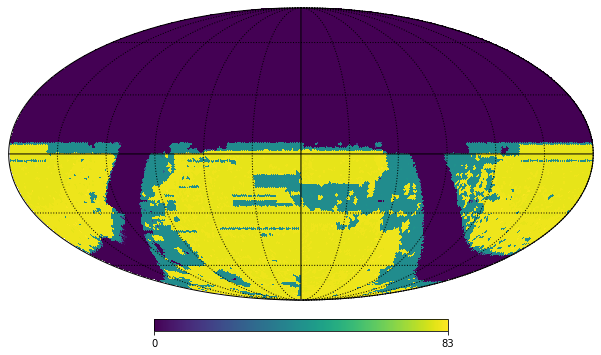

array([ 0.        ,  0.        ,  0.        , ..., 40.51025549,
       40.51025549, 40.51025549])

In [5]:
NSIDE=64
plot_healpix(NSIDE, tab['ra'], tab['dec'])

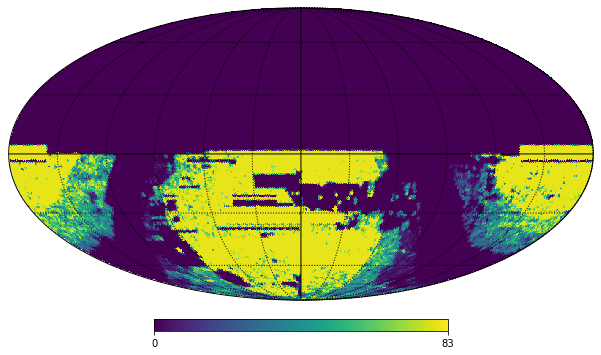

array([ 0.        ,  0.        ,  0.        , ..., 10.72330292,
        2.38295621,  3.57443431])

In [6]:
cond = (tab['Selection']=='F')
plot_healpix(NSIDE, tab['ra'][cond], tab['dec'][cond])

In [7]:
Fcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_F_test_AGN_full_photometry.fits")

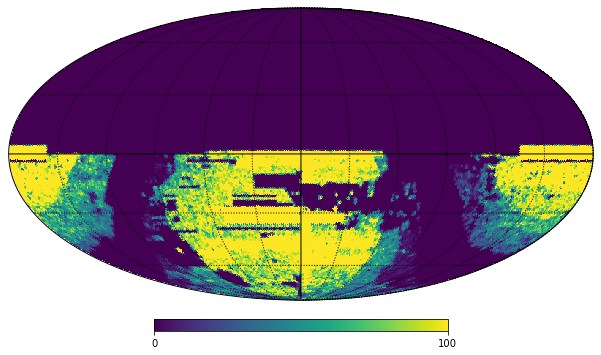

array([ 0.        ,  0.        ,  0.        , ..., 10.72330292,
        2.38295621,  3.57443431])

In [47]:
cond = Fcat['mag_auto_r']<21.5
plot_healpix(NSIDE, Fcat['ra'][cond], Fcat['dec'][cond], cmax=100)

In [39]:
Bcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_BIC_AGN_nb_le_6_full_photometry.fits")

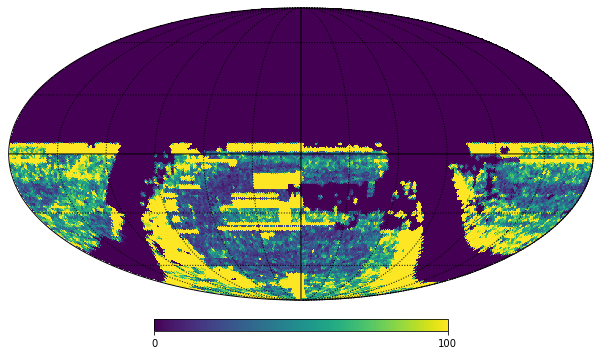

array([  0.        ,   0.        ,   0.        , ..., 142.97737232,
       209.70014607,  40.51025549])

In [46]:
cond = Bcat['mag_auto_r']<21.5
plot_healpix(NSIDE, Bcat['ra'][cond], Bcat['dec'][cond], cmax=100)

In [15]:
Fcat_orig1 = Table.read("Master_Catalog_F_test_AGN.fits")
Fcat_orig2 = Table.read("Master_Catalog_F_test_AGN.complementary.fits")

In [28]:
cond1 = Fcat_orig1['mag']<21.5
Fra1   = Fcat_orig1['ra'][cond1]
Fdec1  = Fcat_orig1['dec'][cond1]

cond2 = Fcat_orig2['mag']<21.5
Fra2   = Fcat_orig2['ra'][cond2]
Fdec2  = Fcat_orig2['dec'][cond2]

Fra = np.concatenate([Fra1,Fra2])
Fdec = np.concatenate([Fdec1,Fdec2])

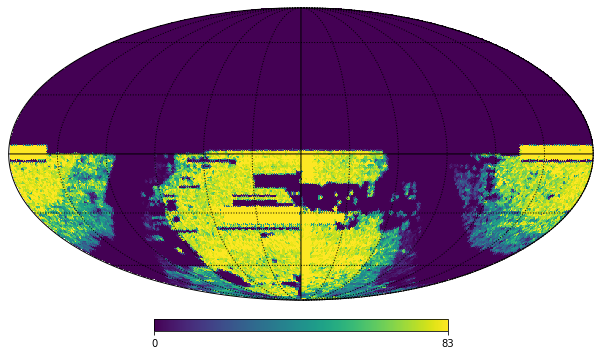

array([ 0.        ,  0.        ,  0.        , ..., 10.72330292,
        2.38295621,  3.57443431])

In [29]:
plot_healpix(NSIDE, Fra, Fdec, cmax=83)

In [30]:
BIC_orig1 = Table.read("Master_Catalog_BIC_AGN_nb_le_6.fits")
BIC_orig2 = Table.read("Master_Catalog_BIC_AGN_nb_le_6.complementary.fits")

In [36]:
cond1 = BIC_orig1['mag']<21.5
Bra1   = BIC_orig1['ra'][cond1]
Bdec1  = BIC_orig1['dec'][cond1]

cond2 = BIC_orig2['mag']<21.5
Bra2   = BIC_orig2['ra'][cond2]
Bdec2  = BIC_orig2['dec'][cond2]

Bra = np.concatenate([Bra1,Bra2])
Bdec = np.concatenate([Bdec1,Bdec2])

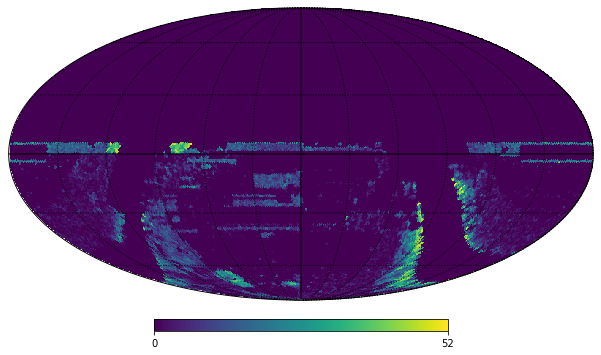

array([ 0.        ,  0.        ,  0.        , ..., 17.87217154,
       22.63808395,  3.57443431])

In [37]:
plot_healpix(NSIDE, Bra, Bdec)

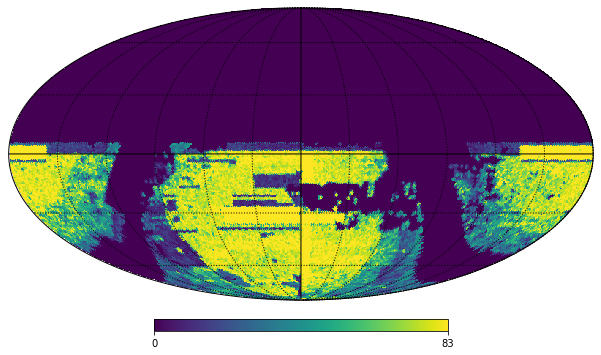

array([ 0.        ,  0.        ,  0.        , ..., 28.59547446,
       25.02104016,  7.14886862])

In [38]:
plot_healpix(NSIDE, np.concatenate([Fra,Bra]), np.concatenate([Fdec,Bdec]), cmax=83)

In [9]:
tab.colnames

['id',
 'ra',
 'dec',
 'mag',
 'nb',
 'chi2_agngal',
 'chi2_gal',
 'chi2_star',
 'BIC',
 'Fp',
 'zphot_agngal',
 'zphot_gal',
 'quick_object_id',
 'mag_auto_g',
 'magerr_auto_g',
 'mag_auto_i',
 'magerr_auto_i',
 'mag_auto_r',
 'magerr_auto_r',
 'mag_auto_z',
 'magerr_auto_z',
 'sourceid_vhs',
 'ypetromag',
 'ypetromagerr',
 'jpetromag',
 'jpetromagerr',
 'hpetromag',
 'hpetromagerr',
 'kspetromag',
 'kspetromagerr',
 'source_id_catwise',
 'w1mpro',
 'w1sigmpro',
 'w2mpro',
 'w2sigmpro',
 'source_id',
 'pm',
 'pmdec',
 'pmdec_error',
 'pmra',
 'pmra_error',
 'radial_velocity',
 'radial_velocity_error',
 'classprob_dsc_combmod_galaxy',
 'classprob_dsc_combmod_quasar',
 'classprob_dsc_combmod_star',
 'flags_g',
 'flags_r',
 'flags_i',
 'flags_z',
 'wavg_mag_auto_g',
 'wavg_magerr_auto_g',
 'wavg_mag_auto_i',
 'wavg_magerr_auto_i',
 'wavg_mag_auto_r',
 'wavg_magerr_auto_r',
 'wavg_mag_auto_z',
 'wavg_magerr_auto_z',
 'exptime_g',
 'exptime_r',
 'exptime_i',
 'exptime_z',
 'nepochs_g',
 'n

In [10]:
tab['Selection']

F
F
F
F
F
F
F
F
F
...
BIC
